In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Read the data

In [2]:
import pathlib
train_data_dir = pathlib.Path("./Train")
test_data_dir = pathlib.Path("./Test")


### Train data dir


In [3]:
train_count = len(list(train_data_dir.glob('*/*.jpg')))
print(train_count)

2239


### Test data dir

In [4]:
test_count = len(list(test_data_dir.glob('*/*.jpg')))
print(test_count)

118


In [5]:
batch_size = 32
image_height = 180
image_width = 180
   

### Train dataset

In [6]:
train_data = keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    seed=40,
    validation_split = 0.2,
    subset='training',
    image_size=(image_height, image_width),  
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


### Validation dataset

In [7]:
validation_data = keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    seed=40,
    validation_split = 0.2,
    subset='validation',
    image_size=(image_height, image_width),  
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
class_type = validation_data.class_names
print(class_type)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


# Data visualization

In [9]:
def visualize_images(data,class_type):
    plt.figure(figsize=(12, 12))
    for images, labels in data.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_type[i])
            plt.axis("off")

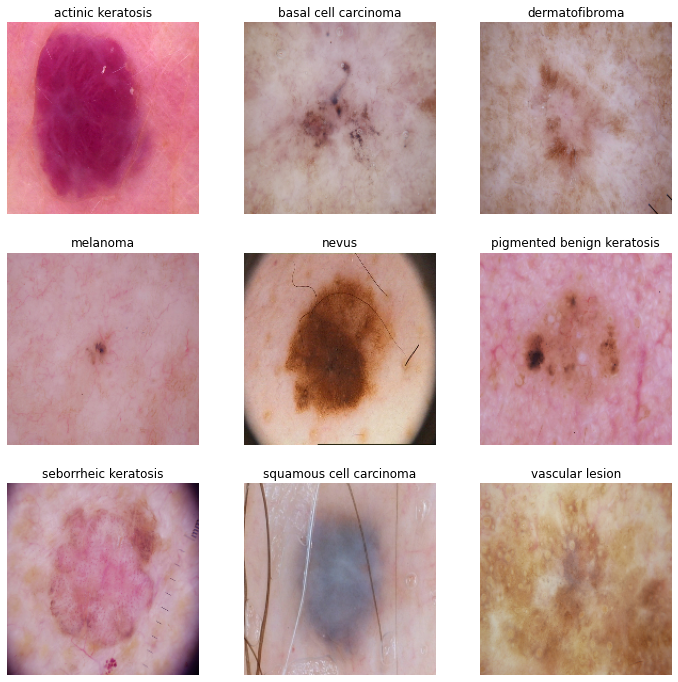

In [10]:
visualize_images(train_data,class_type)

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_data = validation_data.cache().prefetch(buffer_size=AUTOTUNE)

# Model 1


#### Basic model without dropout layers and batch normalization

In [12]:
# Funtion for architecture of model 1
def build_model1(image_height, image_width):
  model = Sequential()
  model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_height, image_width, 3)))
  model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
  model.add(layers.MaxPooling2D())
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(9,activation='softmax'))
  return model

In [13]:
model1= build_model1(image_height,image_width)

In [14]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [16]:
epochs = 20
history1 = model1.fit(
  train_data,
  validation_data=validation_data,
  epochs=epochs
)

Epoch 1/20


c:\Users\Asus\.conda\envs\drugenv\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 14s 170ms/step - loss: 1.9644 - accuracy: 0.2824 - val_loss: 1.8242 - val_accuracy: 0.3647
Epoch 2/20
56/56 [==============================] - 9s 169ms/step - loss: 1.5987 - accuracy: 0.4392 - val_loss: 1.5624 - val_accuracy: 0.4497
Epoch 3/20
56/56 [==============================] - 10s 185ms/step - loss: 1.4231 - accuracy: 0.5033 - val_loss: 1.4563 - val_accuracy: 0.5101
Epoch 4/20
56/56 [==============================] - 10s 177ms/step - loss: 1.3119 - accuracy: 0.5335 - val_loss: 1.3790 - val_accuracy: 0.5190
Epoch 5/20
56/56 [==============================] - 10s 176ms/step - loss: 1.2423 - accuracy: 0.5636 - val_loss: 1.4379 - val_accuracy: 0.5078
Epoch 6/20
56/56 [==============================] - 10s 176ms/step - loss: 1.1837 - accuracy: 0.5737 - val_loss: 1.3450 - val_accuracy: 0.5414
Epoch 7/20
56/56 [==============================] - 10s 174ms/step - loss: 1.1151 - accuracy: 0.6066 - val_loss: 1.3726 - val_accuracy: 0.5459
Epoch 8/20


## Visualization of accuracy for model 1

In [17]:
def acc_plot(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs_range = range(epochs)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

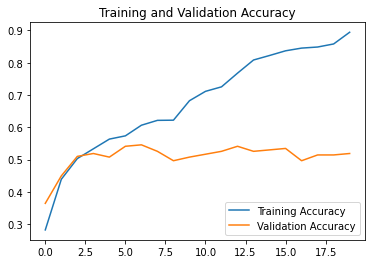

In [18]:
acc_plot(history1)

## Visualization of Loss for model 1

In [19]:
def loss_plot(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

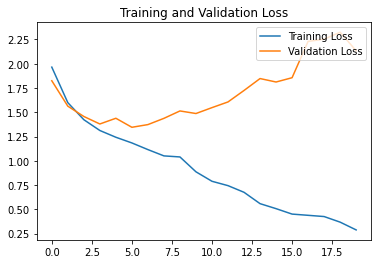

In [20]:
loss_plot(history1)

In [21]:
loss, accuracy = model1.evaluate(train_data, verbose=1,)
loss_v, accuracy_v = model1.evaluate(validation_data, verbose=1)

print("Train Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Train Loss: ",loss)
print("Validation Loss", loss_v)

14/14 [==============================] - 1s 41ms/step - loss: 2.1329 - accuracy: 0.5190
Train Accuracy:  0.9146205186843872
Validation Accuracy:  0.5190156698226929
Train Loss:  0.24348405003547668
Validation Loss 2.1329023838043213


## Based on accuracy metric we find that train accuracy is very high compare to the validation accuracy. It shows overfitting of the data

# Data augmentation

In [22]:
data_augmentation = Sequential()
data_augmentation.add(layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(image_height, image_width, 3)))
data_augmentation.add(layers.experimental.preprocessing.RandomRotation(0.1))
data_augmentation.add(layers.experimental.preprocessing.RandomZoom(0.1))

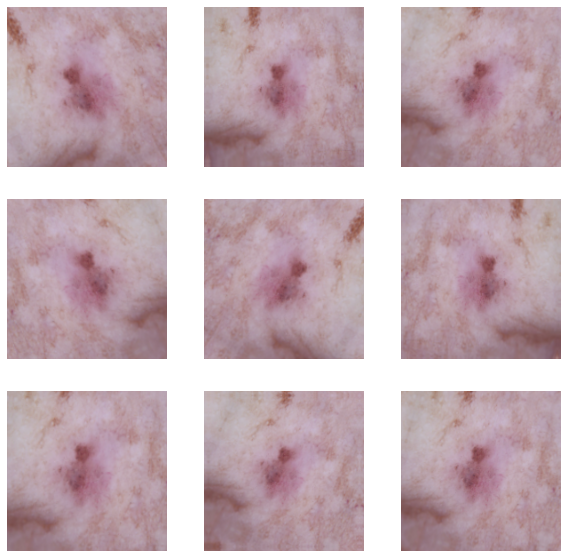

In [23]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

# Model 2

In [24]:
# Funtion for architecture of model 2
def build_model2(data_aug):
    model = Sequential()
    model.add(data_augmentation)
    model.add(layers.experimental.preprocessing.Rescaling(1./255))
    model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D())
    model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D())
    model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D())
    model.add(layers.Dropout(0.2))
    model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D())
    model.add(layers.Dropout(0.2))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(9, activation='softmax'))
    
    return model

In [25]:
model2 = build_model2(data_augmentation)

In [26]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [28]:
history2 = model2.fit(
  train_data,
  validation_data=validation_data,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 13s 221ms/step - loss: 2.0468 - accuracy: 0.2026 - val_loss: 2.0431 - val_accuracy: 0.1141
Epoch 2/20
56/56 [==============================] - 13s 226ms/step - loss: 1.8024 - accuracy: 0.3510 - val_loss: 1.8234 - val_accuracy: 0.3490
Epoch 3/20
56/56 [==============================] - 12s 220ms/step - loss: 1.6347 - accuracy: 0.4096 - val_loss: 1.6332 - val_accuracy: 0.4139
Epoch 4/20
56/56 [==============================] - 13s 225ms/step - loss: 1.5298 - accuracy: 0.4554 - val_loss: 1.5981 - val_accuracy: 0.4161
Epoch 5/20
56/56 [==============================] - 12s 222ms/step - loss: 1.4727 - accuracy: 0.4849 - val_loss: 1.5686 - val_accuracy: 0.4183
Epoch 6/20
56/56 [==============================] - 12s 223ms/step - loss: 1.4270 - accuracy: 0.4967 - val_loss: 1.4976 - val_accuracy: 0.4989
Epoch 7/20
56/56 [==============================] - 12s 223ms/step - loss: 1.3712 - accuracy: 0.5106 - val_loss: 1.4375 - val_accuracy: 0.5078

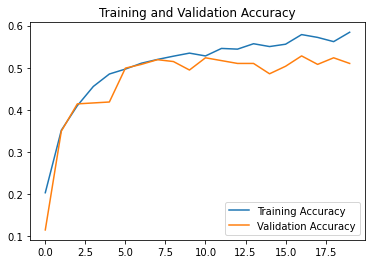

In [29]:
acc_plot(history2)

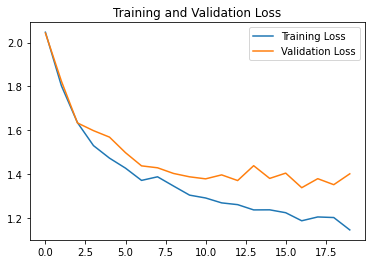

In [30]:
loss_plot(history2)

In [31]:
loss, accuracy = model2.evaluate(train_data, verbose=1,)
loss_v, accuracy_v = model2.evaluate(validation_data, verbose=1)

print("Train Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Train Loss: ",loss)
print("Validation Loss", loss_v)

14/14 [==============================] - 1s 44ms/step - loss: 1.4012 - accuracy: 0.5101
Train Accuracy:  0.5926339030265808
Validation Accuracy:  0.5100671052932739
Train Loss:  1.1107337474822998
Validation Loss 1.4012418985366821


## On comparision with model 1 model 2 performs better. The difference between train and validation accuracy also reduced as we used dropout layers to regularise the model

# Model 3

#### Used model 2 architecture butt increased the number of epochs

In [32]:
model3 = build_model2(data_augmentation)

In [33]:
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [35]:
epochs = 30
history3 = model3.fit(
  train_data,
  validation_data=validation_data,
  epochs=epochs
)

Epoch 1/30
56/56 [==============================] - 14s 232ms/step - loss: 2.0159 - accuracy: 0.2288 - val_loss: 2.1886 - val_accuracy: 0.1902
Epoch 2/30
56/56 [==============================] - 13s 228ms/step - loss: 1.8128 - accuracy: 0.3482 - val_loss: 1.7519 - val_accuracy: 0.4072
Epoch 3/30
56/56 [==============================] - 13s 228ms/step - loss: 1.6258 - accuracy: 0.4146 - val_loss: 1.6371 - val_accuracy: 0.4251
Epoch 4/30
56/56 [==============================] - 13s 231ms/step - loss: 1.5480 - accuracy: 0.4509 - val_loss: 1.6371 - val_accuracy: 0.3915
Epoch 5/30
56/56 [==============================] - 13s 230ms/step - loss: 1.5550 - accuracy: 0.4453 - val_loss: 1.6034 - val_accuracy: 0.4452
Epoch 6/30
56/56 [==============================] - 13s 231ms/step - loss: 1.4855 - accuracy: 0.4643 - val_loss: 1.4857 - val_accuracy: 0.4922
Epoch 7/30
56/56 [==============================] - 13s 230ms/step - loss: 1.4165 - accuracy: 0.5084 - val_loss: 1.4208 - val_accuracy: 0.5123

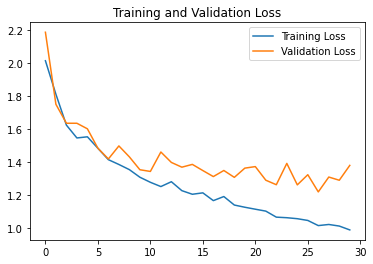

In [36]:
loss_plot(history3)

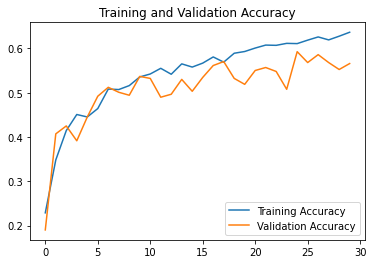

In [37]:
acc_plot(history3)

In [38]:
loss, accuracy = model3.evaluate(train_data, verbose=1,)
loss_v, accuracy_v = model3.evaluate(validation_data, verbose=1)

print("Train Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Train Loss: ",loss)
print("Validation Loss", loss_v)

14/14 [==============================] - 1s 44ms/step - loss: 1.3819 - accuracy: 0.5660
Train Accuracy:  0.6668526530265808
Validation Accuracy:  0.5659955143928528
Train Loss:  0.9048372507095337
Validation Loss 1.381890058517456


## By increasing the epochs the difference between train and validation accyuracy getting increased. This shows that it tends to get overfit the data

# Model 4

#### In model 4 added extra dropout layers

In [39]:
def build_model4(data_aug):
    model = Sequential()
    model.add(data_augmentation)
    model.add(layers.experimental.preprocessing.Rescaling(1./255))
    model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D())
    model.add(layers.Dropout(0.2))
    model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D())
    model.add(layers.Dropout(0.2))
    model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D())
    model.add(layers.Dropout(0.2))
    model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D())
    model.add(layers.Dropout(0.2))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(9, activation='softmax'))
    return model

In [40]:
model4= build_model4(data_augmentation)

In [41]:
model4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [42]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 90, 90, 16)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 90, 90, 32)        4640      
                                                      

In [43]:
epochs = 20
history4 = model4.fit(
  train_data,
  validation_data=validation_data,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 15s 254ms/step - loss: 2.1083 - accuracy: 0.2098 - val_loss: 2.1096 - val_accuracy: 0.2886
Epoch 2/20
56/56 [==============================] - 14s 256ms/step - loss: 1.8474 - accuracy: 0.3387 - val_loss: 1.9831 - val_accuracy: 0.2685
Epoch 3/20
56/56 [==============================] - 14s 255ms/step - loss: 1.6347 - accuracy: 0.4169 - val_loss: 1.8200 - val_accuracy: 0.3535
Epoch 4/20
56/56 [==============================] - 14s 258ms/step - loss: 1.5634 - accuracy: 0.4358 - val_loss: 1.7359 - val_accuracy: 0.3691
Epoch 5/20
56/56 [==============================] - 14s 259ms/step - loss: 1.5745 - accuracy: 0.4291 - val_loss: 1.8080 - val_accuracy: 0.3445
Epoch 6/20
56/56 [==============================] - 15s 259ms/step - loss: 1.5387 - accuracy: 0.4453 - val_loss: 1.7766 - val_accuracy: 0.3736
Epoch 7/20
56/56 [==============================] - 14s 258ms/step - loss: 1.5017 - accuracy: 0.4676 - val_loss: 1.7184 - val_accuracy: 0.3781

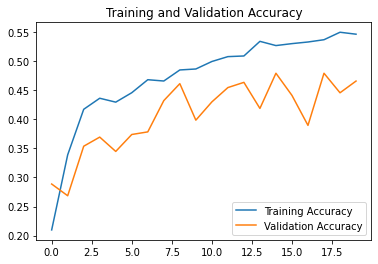

In [44]:
acc_plot(history4)

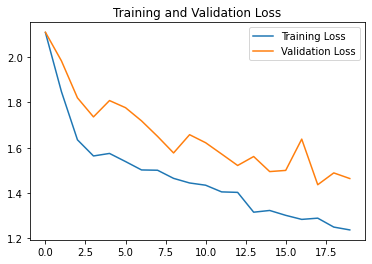

In [45]:
loss_plot(history4)

In [76]:
loss, accuracy = model4.evaluate(train_data, verbose=1,)
loss_v, accuracy_v = model4.evaluate(validation_data, verbose=1)

print("Train Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Train Loss: ",loss)
print("Validation Loss", loss_v)

14/14 [==============================] - 1s 39ms/step - loss: 1.4638 - accuracy: 0.4653
Train Accuracy:  0.5145089030265808
Validation Accuracy:  0.46532437205314636
Train Loss:  1.309385061264038
Validation Loss 1.4637764692306519


## Model 4 performs good as difference between train and validation accuracy is very less. 

In [47]:
## Your code goes here.
class_names=[]
count =[]
for i in class_type:
    sample_count = len(list(train_data_dir.glob(i + '/*.jpg')))
    class_names.append(i)
    count.append(sample_count)
    print(str(i) + " : " + str(sample_count) )

actinic keratosis : 114
basal cell carcinoma : 376
dermatofibroma : 95
melanoma : 438
nevus : 357
pigmented benign keratosis : 462
seborrheic keratosis : 77
squamous cell carcinoma : 181
vascular lesion : 139


# Class Distribution

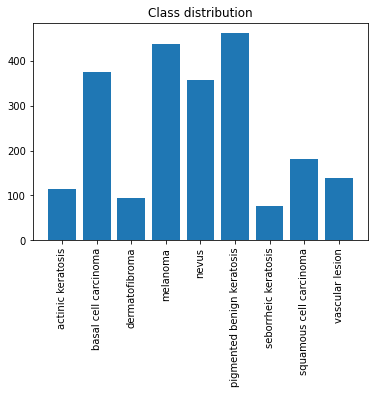

In [48]:
plt.bar(class_names,count)
plt.xticks(rotation=90)
plt.title("Class distribution")
plt.show()


# Handling inbalance data

#### Making 500 as the size of each classes

In [49]:
path_to_training_dataset=str(train_data_dir) + '/'
import Augmentor
for i in class_type:
    data = Augmentor.Pipeline(path_to_training_dataset + i)
    data.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    data.sample(500)

Initialised with 114 image(s) found.
Output directory set to Train/actinic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x21319487220>: 100%|██████████| 500/500 [00:01<00:00, 408.83 Samples/s]


Initialised with 376 image(s) found.
Output directory set to Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2130FA07F70>: 100%|██████████| 500/500 [00:01<00:00, 386.24 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2131D57A2B0>: 100%|██████████| 500/500 [00:01<00:00, 391.66 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2131949C820>: 100%|██████████| 500/500 [00:05<00:00, 83.52 Samples/s]                    


Initialised with 357 image(s) found.
Output directory set to Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=576x768 at 0x2130E0B9FA0>: 100%|██████████| 500/500 [00:05<00:00, 96.20 Samples/s]                     


Initialised with 462 image(s) found.
Output directory set to Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2130DF5FA90>: 100%|██████████| 500/500 [00:01<00:00, 395.99 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x21302C35940>: 100%|██████████| 500/500 [00:02<00:00, 190.16 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x213133C8580>: 100%|██████████| 500/500 [00:01<00:00, 413.53 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to Train/vascular lesion\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2130A2B4C40>: 100%|██████████| 500/500 [00:01<00:00, 381.58 Samples/s]


In [50]:
image_count_train = len(list(train_data_dir.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [51]:
from glob import glob
import os

path_list = [x for x in glob(os.path.join(train_data_dir, '*','output', '*.jpg'))]
path_list



['Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_1539bc21-a8bf-490b-9820-0619858c7bae.jpg',
 'Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_4113eeef-8514-479a-b6ba-8fd4a0029391.jpg',
 'Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_642e0cc6-ce44-47c8-8228-60b556d023ce.jpg',
 'Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_76d266dd-f048-40fe-b6bd-c0d808826de1.jpg',
 'Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_d4d1bbac-f043-4939-9353-5a4e34df2947.jpg',
 'Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_41b61d98-8c3b-4ee5-8f4e-848d4f8e3e12.jpg',
 'Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_5ab4e462-fa24-4899-b725-64ae5342c8da.jpg',
 'Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_679bf701-cbd4-4d0d-88f6-8cdcbff205de.jpg',
 'Train\\actinic

In [52]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(train_data_dir, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [53]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2
new_df['Label'].value_counts()

dermatofibroma                500
vascular lesion               500
basal cell carcinoma          500
seborrheic keratosis          500
actinic keratosis             500
melanoma                      500
pigmented benign keratosis    500
nevus                         500
squamous cell carcinoma       500
Name: Label, dtype: int64

# New train directory

In [54]:
new_train_dir=train_data_dir
new_train_data = tf.keras.preprocessing.image_dataset_from_directory(
  new_train_dir,
  seed=123,
  validation_split = 0.2,
  subset = "training", ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(image_height, image_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [55]:
new_validation_data = tf.keras.preprocessing.image_dataset_from_directory(
  new_train_dir,
  seed=123,
  validation_split = 0.2,
  subset = "validation", ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(image_height, image_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


# Model 5

## Same architecture as model 2 but with new balanced dataset

In [56]:
model5 = build_model2(data_augmentation)

In [57]:
model5.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [58]:
model5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

In [59]:
history5 = model5.fit(
  train_data,
  validation_data=validation_data,
  epochs=epochs
)

Epoch 1/20


c:\Users\Asus\.conda\envs\drugenv\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 14s 236ms/step - loss: 1.9816 - accuracy: 0.2494 - val_loss: 1.9594 - val_accuracy: 0.2864
Epoch 2/20
56/56 [==============================] - 13s 240ms/step - loss: 1.8059 - accuracy: 0.3365 - val_loss: 1.7923 - val_accuracy: 0.3020
Epoch 3/20
56/56 [==============================] - 13s 236ms/step - loss: 1.6294 - accuracy: 0.4107 - val_loss: 1.9438 - val_accuracy: 0.3065
Epoch 4/20
56/56 [==============================] - 13s 235ms/step - loss: 1.6356 - accuracy: 0.4057 - val_loss: 1.6219 - val_accuracy: 0.4139
Epoch 5/20
56/56 [==============================] - 14s 251ms/step - loss: 1.5045 - accuracy: 0.4676 - val_loss: 1.6018 - val_accuracy: 0.4094
Epoch 6/20
56/56 [==============================] - 14s 243ms/step - loss: 1.4743 - accuracy: 0.4704 - val_loss: 1.5911 - val_accuracy: 0.4362
Epoch 7/20
56/56 [==============================] - 13s 237ms/step - loss: 1.4336 - accuracy: 0.4838 - val_loss: 1.5679 - val_accuracy: 0.4251
Epoch 8/20

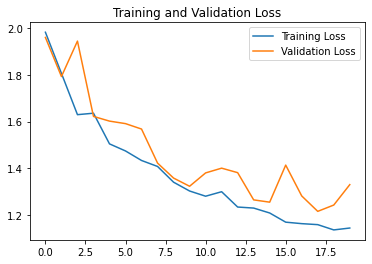

In [60]:
loss_plot(history5)

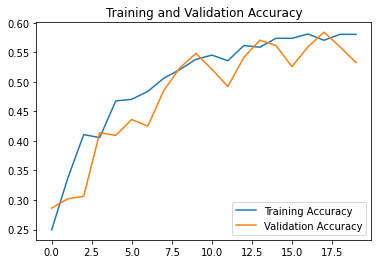

In [61]:
acc_plot(history5)

In [71]:
loss, accuracy = model5.evaluate(train_data, verbose=1,)
loss_v, accuracy_v = model5.evaluate(validation_data, verbose=1)

print("Train Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Train Loss: ",loss)
print("Validation Loss", loss_v)

14/14 [==============================] - 1s 44ms/step - loss: 1.3304 - accuracy: 0.5324
Train Accuracy:  0.6110491156578064
Validation Accuracy:  0.5324384570121765
Train Loss:  1.098777413368225
Validation Loss 1.330367922782898


## It doesn't show much improvement based on accuracy


# Model 6

#### Added Batch normalization to see the performance

In [63]:
def build_model6(image_height, image_width):
    model = Sequential()
    model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_height, image_width, 3)))
    model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D())
    model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D())
    model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D())
    model.add(layers.Dropout(0.2))
    model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D())
    model.add(layers.Dropout(0.2))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(9, activation='softmax'))
    return model

In [64]:
model6 = build_model6(image_height,image_width)

In [65]:
model6.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [66]:
model6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_19 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 45, 45, 64)       

In [72]:
history6 = model6.fit(
  train_data,
  validation_data=validation_data,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 11s 200ms/step - loss: 0.2300 - accuracy: 0.9046 - val_loss: 3.0980 - val_accuracy: 0.4004
Epoch 2/20
56/56 [==============================] - 12s 207ms/step - loss: 0.2255 - accuracy: 0.9129 - val_loss: 5.6973 - val_accuracy: 0.3221
Epoch 3/20
56/56 [==============================] - 12s 213ms/step - loss: 0.1831 - accuracy: 0.9280 - val_loss: 3.1059 - val_accuracy: 0.4206
Epoch 4/20
56/56 [==============================] - 12s 213ms/step - loss: 0.1825 - accuracy: 0.9258 - val_loss: 2.4918 - val_accuracy: 0.5302
Epoch 5/20
56/56 [==============================] - 12s 216ms/step - loss: 0.1614 - accuracy: 0.9330 - val_loss: 2.5428 - val_accuracy: 0.4720
Epoch 6/20
56/56 [==============================] - 12s 216ms/step - loss: 0.1651 - accuracy: 0.9330 - val_loss: 3.1349 - val_accuracy: 0.4653
Epoch 7/20
56/56 [==============================] - 12s 219ms/step - loss: 0.1249 - accuracy: 0.9475 - val_loss: 3.1795 - val_accuracy: 0.4251

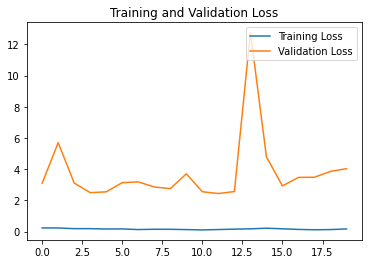

In [73]:

loss_plot(history6)

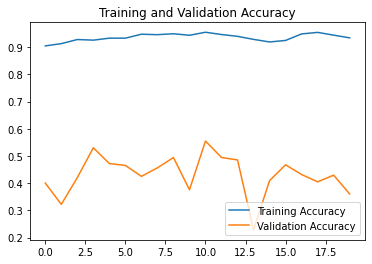

In [74]:
acc_plot(history6)

In [75]:
loss, accuracy = model6.evaluate(train_data, verbose=1,)
loss_v, accuracy_v = model6.evaluate(validation_data, verbose=1)

print("Train Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Train Loss: ",loss)
print("Validation Loss", loss_v)

14/14 [==============================] - 1s 44ms/step - loss: 4.0285 - accuracy: 0.3602
Train Accuracy:  0.5206473469734192
Validation Accuracy:  0.36017897725105286
Train Loss:  2.353137493133545
Validation Loss 4.028545379638672


#### Model 6 doesn't show any improvement in accuracy even after adding bachnormalization to the model

## 

# In comparision with all 6 models model 2 and model 4 performs better
### Model 2

#### Train Accuracy:  0.5926339030265808
#### Validation Accuracy:  0.5100671052932739
#### Train Loss:  1.1107337474822998
#### Validation Loss 1.4012418985366821

### Model 4

#### Train Accuracy:  0.5145089030265808
#### Validation Accuracy:  0.46532437205314636
#### Train Loss:  1.309385061264038
#### Validation Loss 1.46377646923065194

### Model 5 also performs good